## Функции Активации

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
import torch

In [7]:
import numpy as np

## MLP

## Данные

In [20]:
import torchvision as tv

In [21]:
import time

In [22]:
BATCH_SIZE=256

In [33]:
train_dataset = tv.datasets.MNIST('.', train=True, transform=tv.transforms.ToTensor(), download=True)
test_dataset = tv.datasets.MNIST('.', train=False, transform=tv.transforms.ToTensor(), download=True)
train = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE)
test = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE)

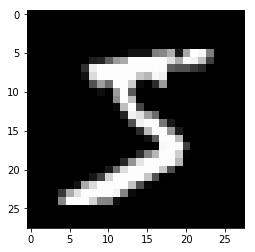

In [34]:
plt.imshow(train_dataset[0][0].numpy().reshape(28,28), cmap='gray')

## Модель

In [35]:
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(784, 256),
    torch.nn.ReLU(),
    torch.nn.Linear(256, 10)
)

In [36]:
loss = torch.nn.CrossEntropyLoss()
trainer = torch.optim.SGD(model.parameters(), lr=0.5)
num_epochs = 10

In [ ]:
for ep in range(num_epochs):
    train_iters, train_passed  = 0, 0
    train_loss, train_acc = 0., 0.
    
    for X, y in train:
        trainer.zero_grad()
        y_pred = model(X)
        l = loss(y_pred, y)
        l.backward()
        trainer.step()
        train_loss += l.item()
        train_acc += (y_pred.argmax(dim=1) == y).sum().item()
        train_iters += 1
        train_passed += len(X)
    
    test_iters, test_passed  = 0, 0
    test_loss, test_acc = 0., 0.
    for X, y in test:
        y_pred = model(X)
        l = loss(y_pred, y)
        test_loss += l.item()
        test_acc += (y_pred.argmax(dim=1) == y).sum().item()
        test_iters += 1
        test_passed += len(X)
        
    print("ep: {}, train_loss: {}, train_acc: {}, test_loss: {}, test_acc: {}".format(
        ep, train_loss / train_iters, train_acc / train_passed,
        test_loss / test_iters, test_acc / test_passed)
    )

ep: 0, train_loss: 0.434010862289591, train_acc: 0.8736666666666667, test_loss: 0.23843665085732937, test_acc: 0.9268
ep: 1, train_loss: 0.18657964374473754, train_acc: 0.9462833333333334, test_loss: 0.17537119300104678, test_acc: 0.9445
ep: 2, train_loss: 0.13503961163236106, train_acc: 0.9619666666666666, test_loss: 0.1370747016509995, test_acc: 0.9566


## Практика - попробуйте заменить SGD на Adam и RMSProp. Увеличиться ли скорость сходимости?

## Практика - попробуйте сделать больше слоев в сети  - увеличиться ли качество?

In [ ]:
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(784, 512),
    torch.nn.ReLU(),
    torch.nn.Linear(512, 256),
    torch.nn.ReLU(),
    torch.nn.Linear(256, 128),
    torch.nn.ReLU(),
    torch.nn.Linear(128, 10)
)

# trainer = torch.optim.Adam(model.parameters(), lr=0.01)
# train_model()


## Практика - попробуйте добавить регуляризацию, dropout и/или batchnorm-слои. Увеличится ли качество?

In [ ]:
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(784, 512),
    torch.nn.ReLU(),
    torch.nn.BatchNorm1d(512),
    torch.nn.Linear(512, 256),
    torch.nn.ReLU(),
    torch.nn.BatchNorm1d(256),
    torch.nn.Linear(256, 128),
    torch.nn.ReLU(),
    torch.nn.BatchNorm1d(128),
    torch.nn.Linear(128, 10)
)
# trainer = torch.optim.Adam(model.parameters(), lr=0.01)